# Chapter 07 : 랜덤 포레스트 모델
## 사전 지식
### 부트스트래핑
**부트스트래핑(bootstrapping)**
- 주어진 데이터가 샘플이 아닌 모집단 그 자체라 가정하고 이를 이용해 수많은 시뮬레이션 샘플을 만들어내는 기법
- 통계 검정에서는 신뢰 구건을 추산할 때 자주 사용
- 모집단을 가정하므로 부트스트래핑 데이터를 구성할 때는 복원 추출(sampling with replacement)을 사용

#### 부트스트래핑 절차
1. 미리 정의한 큰 $N$과 $M$값에 대하여 다음을 반복한다.
    - 이번 예시에서는 $N$ = 10,000으로 한다.
2. 주어진 데이터에 복원 추출을 수행하여 크기 $M$의 새로운 데이터셋을 만든다.
3. 이 데이터셋을 기준으로 $X_1^{X_2}$의 평균값을 계산한다.
4. 10,000회 기록한 $X_1^{X_2}$의 평균값을 크기가 작은 것부터 순서대로 정렬한다.
5. 이제 90% 신뢰 구간을 구하고자 정렬한 리스트의 500번째 원소와 9,500번째 원소의 값을 찾으면 된다.
6. 해당 값이 구하고자 하는 신뢰 구간의 양쪽 끝이다.
  
- 부트스트래핑은 복원 추출이므로 수행할 때 원본 데이터셋에는 있으나 부트스트랩 데이터에는 없는 샘플이 발생할 가능성이 큼
- 배깅(bagging)에서는 이를 OOB(out-of-bag) 샘플이라고 함
- 부트스트래핑 데이터로 학습한 후 학습한 모델의 성능을 OOB 샘플로 검증하는 방법을 트리별로 반복할 수 있음  
  
**K-fold 교차검증법(K-fold cross validation)**  
- 데이터를 K개의 서브데이터 파티션(partition)으로 나눈 다음, 이 중에서 (k - 1)개의 데이터를 학습 데이터로 선택하여 학습을 진행하고 나머지 1개의 데이터를 검증 데이터로 하여 성능을 테스트하는 것
- 테스트 데이터셋을 선택할 수 있는 경우의 수가 K개이므로 학습 데이터셋과 검증 데이터셋의 조합이 K개가 만들어짐
- 모든 샘플이 학습 데이터나 검증 데이터에 한 번씩만 사용된다는 점이 다름
  
### 앙상블 학습 기법
**앙상블 학습 기법(ensemble learning method) = 앙상블 기법**
- 여러 개의 베이스 학습기(base learner)를 준비하여 학습을 수행한 후 학습 결과를 종합하여 최종 결과를 예측하는 기법
- 일반화 가능성(generalizability)이 높으며 강건성(robusteness)이 있음
- 배깅(bagging = bootstrap aggregating)과 부스팅(boosting)을 자주 사용

**배깅**
- 주어진 데이터셋으로 수많은 부트스트랩 샘플을 생성한 후 각각 독립적인 다수의 학습기를 만들어 병렬로 학습
- 예측 단계에서는 각각의 학습기로 얻은 예측값을 대상으로 평균이나 투표 등의 방식을 적용하여 최종 예측값을 산출
- 해당 앙상블 모델은 단일 학습기에 비해 분산(variance)이 감소하는 효과가 있으므로 베이스 학습기가 낮은 편향과 높은 분산을 보일 때 유용
- 베이스 학습기
    - 최대 깊이의 크기가 큰 결정 트리
    - 다층 퍼셉트론(multilayer perceptron, MLP)
    - 서포트 벡터 머신(support vector machine, SVM)
    - K가 작은 K-최근접 이웃(K-nearest neighbors, KNN)
- 대표적인 배깅 모델 : 결정 트리를 베이스 학습기로 하여 구축한 랜덤 포레스트(random forest)
  
**부스팅**
- 여러 베이스 학습기를 만든 후 순차적으로(sequentially) 학습하는 직렬 앙상블 모델
- 각각의 베이스 학습기가 잘 학습하지 못하는 부분을 뒤의 베이스 학습기로 넘겨서 순서대로 편향(bias)을 줄이는 것을 목표로 함
- 분산이 낮고 편향이 상대적으로 높은 베이스 학습기에 적용하면 유용
- 베이스 학습기
    - 최대 깊이의 크기가 작은 결정 트리
    - 로지스틱 회귀 모델
    - K가 큰 KNN 모델
- 대표적인 부스팅 모델 : 에이다부스트(AdaBoost), 그레이디언트 부스팅 트리(gradient bosting trees, GBT)
  
- 앙상블 모델에서 사용하는 베이스 학습기는 상대적으로 약한 성능을 지닌 단순한 모델로 구성될 때가 많음 $\rightarrow$ 약한 학습기(weak learner)

## 1. 랜덤 포레스트 모델이란?
**랜덤 포레스트(random forest)**
- 여러 개의 결정 트리를 학습하고 그 결과를 종학하는 앙상블 학습 모델의 하나
- 비지도 학습에 적용할 수도 있으나 주로 분류, 회귀 등의 지도 학습에 사용
- 분류 문제 : 각 결정 트리의 예측 클래스 레이블을 투표한 후 최다 득표 레이블을 선택
- 회귀 문제 : 각 결정 트리 예측값의 평균을 예측값으로 함
- 결정 트리의 과적합(overfitting) 문제를 줄일 수 있음
- 성능 : 데이터 특성에 따라 다르겠지만, 결정 트리보다는 우수, GBT에 비해서는 떨어지는 경향
- 예측 결과에 대한 해석이 어려운 블랙 박스(black box) 계열의 모델

## 2. 랜덤 포레스트 모델 구현하기
### 랜덤 포레스트 모델의 기본 이론
- 트리의 깊이가 깊어짐에 따라 학습 데이터에만 적합한 과도하게 불규칙한 패턴을 학습하는 경향이 커지기 때문에 결정 트리에는 과적합에 취약하다는 단점이 존재  
- 결정 트리 : 편향은 낮지만(low bias) 분산은 높음(high variance)  
- 분산을 줄이고자 랜덤 포레스트에서는 학습 데이터를 다르게 샘플링한 후 각각의 서브데이터에서 깊이가 깊은 결정 트리를 학습하고 결과를 최종적으로 종합하여 출력값을 계산  
- 모델의 해석력(interpretability)이 줄지만 일반화 가능성은 결정 트리를 압도하게 됨  
  
#### 학습 알고리즘
- 피처 $X$, 목표 변수 $y$, 트리의 수 $n_{trees}$
- 학습 단계
    - $b = 1, 2, \dots, n_{trees}$
    1. $(X, y)$ 쌍에 부트스트래핑을 적용하여 부트스트랩 데이터 $(X_b, y_b)$를 얻는다.
    2. $(X_b, y_b)$에 분류 트리나 회귀 트리를 적용하여 함수(규칙) $f_b$를 학습한다.
      
- 예측 단계
    1. 테스트 샘플 $x$가 주어졌을 때 $b = 1, 2, \dots, n_{trees}$에 대하여 $\hat{y}_b = f_b(x)$를 산출한다.
    2. 분류 트리는 $\hat{y}_b$에 대한 다수결(majority vote)로, 회귀 트리는 $\hat{y}_b$의 평균으로 최종 예측값을 계산한다.
  
  
배깅 : 모델의 편향을 증가시키지 않은 채로 분산을 감소 $\rightarrow$ 전체적인 모델 성능이 높아진다고 할 수 있음  
- 단일 결정 트리의 예측 : 노이즈에 크게 민감할 수 있음  
- 독립된 결정 트리에서 예측을 수행하고 이를 평균하면 노이즈에 대한 민감도는 낮아짐  
- 단일 학습 데이터셋에서 여러 결정 트리를 학습하면 트리 사이의 상관관계가 강해질 수 있으므로 배깅에서는 결정 트리별로 다른 학습 데이터셋을 부여하여 트리 사이의 상관관계를 줄임  
  
트리 개수 $n_{trees}$
- 학습 데이터셋의 크기와 성질에 따라 달라질 수 있음
- 수백에서 수천 개 정도로 설정 가능
- 최적값은 교차검증법(cross validation) 등의 기법으로 찾을 수 있음
- 학습 오차와 테스트 오차는 적당한 수의 트리가 갖추어진 후에 비슷해지는 경향이 있음
  
#### 시간 복잡도
- 렌덤 포레스트 모델 : 수많은 결정 트리를 병렬로 학습한 후 결과를 종합하는 기법
- 시간 복잡도 : 결정 트리의 시간 복잡도 * 트리 수
- 가정
    - $n$개의 샘플, $p$개 피처가 있는 데이터셋에서 $n_{trees}$개의 트리로 랜덤 포레스트 모델을 구성
    - 각각의 트리가 균형 있게 구성
- 각 트리에 대한 학습의 시간 복잡도 : $O(nplogn)$
- 랜덤 포레스트 모델 학습의 시간 복잡도 : $O(n_{trees}nplogn)$ 

#### 피처 배깅
- 피처 배깅(feature bagging) ; 랜덤 포레스트에서 각각의 분기 규칙을 계산할 때 전체 피처의 무작위 부분 집합을 사용하는 것
- 부트스트랩 샘플을 사용할 때의 발생할 수 있는 트리의 상관관계를 줄이고자 사용
- 일부 피처로도 목푯값을 강하게 설명할 수 있다면 트리 사이에 높은 상관관계가 발생할 수 있기 때문에 해당 피처는 대다수의 트리에서 선택될 것

### 랜덤 포레스트 분류 모델 구현하기
- 랜덤 포레스트 분류 알고리즘 구현
- 붓꽃 데이터셋
- eval_gini() 함수와 eval_class() 함수를 구현

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris(as_frame = True)['frame']
df = df[df['target'] <= 1]
df = df.sample(frac = 1, random_state = 1234)

train, test = df.iloc[:75, :], df.iloc[75:, :]
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
X_cols, y_col = train.columns.tolist()[:-1], train.columns.tolist()[-1]

def eval_gini(left, right, y_col):
    gini, n1, n2 = 0, len(left), len(right)
    
    score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
    gini += score * n1 / (n1 + n2)
    
    score = 1 - ((right[y_col].value_counts())**2).sum() / (n2**2)
    gini += score * n2 / (n1 + n2)
    
    return gini

def eval_class(df, y_col):
    return df[y_col].value_counts().sort_values(ascending = False).index[0]

- 분류 트리 학습 부분을 base_tree() 함수로 표현
- base_tree() 함수 : 학습 데이터셋, 피처와 출력 클래스의 이름, 최대 깊이, 분할에 필요한 노드 증의 최소 크기 등을 인수로 받음

In [15]:
def base_tree(train, X_cols, y_col, max_depth = 4, min_samples_split = 4):
    tree = []
    for i in range(0, 2**(max_depth + 1)):
        tree.append(dict({'struct' : None}))
        
    tree[1]['struct'] = train
    
    for i in range(1, len(tree)):
        if (not isinstance(tree[i]['struct'], pd.DataFrame)):
            continue
            
        if (i >= 2**max_depth):
            tree[i]['struct'] = eval_class(tree[i]['struct'], y_col)
            continue
            
        data = tree[i]['struct']
        a, b, c, d, e = '', float('inf'), float('inf'), None, None
        
        for X_col in X_cols:
            vals = np.sort(data[X_col].unique())
            for val in vals:
                left, right = data[data[X_col] < val], data[data[X_col] >= val]
                gini = eval_gini(left, right, y_col)
                if (gini < c):
                    a, b, c, d, e = X_col, val, gini, left, right
                    
        tree[i]['col'] = a
        tree[i]['val'] = b
        if (len(d) >= min_samples_split):
            tree[i << 1]['struct'] = d
        else:
            tree[i << 1]['struct'] = eval_class(e, y_col)
            
        if (len(e) >= min_samples_split):
            tree[(i << 1) + 1]['struct'] = e
        else:
            tree[(i << 1) + 1]['struct'] = eval_class(e, y_col)
    
    return tree

- 9개 트리로 구성한 랜덤 포레스트 분류기를 구현
- 각각의 트리에 대하여 전체 학습 데이터셋의 일부 샘플을 학습시킨 후 이 구조를 리스트 형태로 저장하기만 하면 됨
- 주어진 정보를 최대한으로 할용하려면 샘플링 비율을 1로 하되 복원 추출을 수행하는 pd.DataFrame.sample(frac = 1, replace = True) 함수를 적용해야 하나 코드의 수행 속도를 고려하여 샘플링 비율을 0.3 정도로 낮게 설정

In [16]:
max_samples = 0.3
forest = []
for i in range(9):
    train0 = train.sample(frac = max_samples, random_state = 1234)
    forest.append(base_tree(train0, X_cols, y_col))

C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\T

C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\T

C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\T

C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\T

C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)
C:\Users\82108\AppData\Local\Temp\ipykernel_23856\2583538923.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  score = 1 - ((left[y_col].value_counts())**2).sum() / (n1**2)


- 학습한 모델의 예측력을 평가하는 방법은 결정 트리에서와 매우 비슷
- 각 트리를 평가한 다음 최종 결과를 다수결로 정하는 방법만 추가하면 됨

In [17]:
cnt = 0
for i in range(len(X_test)):
    row = X_test.iloc[i]
    y_pred = [0, 0]
    for tree in forest:
        ind = 1
        node = tree[ind]
        while (isinstance(node['struct'], pd.DataFrame)):
            if (row[node['col']] < node['val']):
                ind = ind << 1
            else:
                ind = (ind << 1) + 1
                
            node = tree[ind]
            
        y_pred_tree = node['struct']
        y_pred[y_pred_tree] += 1
        
    if (y_pred[0] > y_pred[1]):
        y_pred = 0
    else:
        y_pred = 1
        
    cnt += (y_pred == y_test.iloc[i]) * 1
    
print(f'테스트 데이터셋 정확도 : {cnt / len(y_test) * 100 : .2f}%')

테스트 데이터셋 정확도 :  100.00%


## 3. 패키지로 표현하기
**RandomForestClassifier 클래스**
- sklearn.ensemble 모듈
- 랜덤 포레스트 분류 모델을 구현
- 하이퍼파라미터 : sklearn.tree.DecisionTreeClassifier 클래스의 하이퍼파라미터 + 트리 구성에 필요한 여러 가지 하이퍼파라미터 추가
    - $n$ : 샘플 개수
    - $p$ : 피처 개수
- n_estimators
    - 주요값 : int > 0
    - 기본값 : 100
    - 의미 : 트리 개수
- bootstrap
    - 주요값 : bool
    - 기본값 : True
    - 의미 : 부트스트랩 샘플 사용 여부
        - True : 개별 트리를 학습할 때 부트스트랩 샘플을 사용
        - False : 개별 트리를 학습할 때 부트스트랩 샘플 대신 항상 전체 데이터셋 사용
        - max_features에 따라 트리별 랜덤성이 발생하므로 랜덤 포레스트 모델에서의 각각의 트리는 서로 다른 구조를 지님
- oob_score
    - 주요값 : bool
    - 기본값 : False
    - 의미 : bootstrap = True일 때만 유효하며, 일반화 점수(generalization score)를 계산할 때 OOB 샘플을 사용할지 선택
- max_samples
    - 주요값 : None, int, 0 < float $\leq$ 1
    - 기본값 : None
    - 의미 : bootstrap = True일 때만 유효하며, 각각의 베이스 학습기를 학습하기 위해 추출할 샘플 개수 지정
        - None : 전체 샘플 추출
        - int : max_samples 건 추출
        - float : $n$과 max_samples의 곱에 해당하는 샘플 개수를 추출
        
**실제 사용 시 활용 팁**
- 결정 트리와 마찬가지로 max_depth 등 트리 크기를 제어하는 하이퍼파라미터를 기본값으로 설정하면 트리가 최대로 커질 수 있음  
$\rightarrow$ 메모리 소비를 줄이려면 값을 적절하게 설정해야 함
- max_features를 $\sqrt{p}$로 하는 것이 좋다고 알려져 있음  
  하지만 실제로 최적 개수는 문제에 따라 다를 수 있음  
  하이퍼파라미터 튜닝을 통해 얻을 수 있음

## 4. 랜덤 포레스트 모델 보충 수업
### 랜덤 포레스트 회귀 모델
- 랜덤 포레스트 회귀 모델도 랜덤 포레스트 분류 모형으로 쉽게 확장할 수 있음
- 독립적인 다수의 회귀 트리에서 나온 예측값의 평균을 구하여 랜덤 포레스트 회귀 모델을 구현 가능

**RandomForestRegressor 클래스**
- 랜덤 포레스트 회귀 모델 구현
- 하이퍼파라미터 : sklearn.tree.DecisionTreeRegressor 클래스의 하이퍼파라미터 + 트리 구성에 필요한 여러 가지 하이퍼파라미터 추가
- n_estimators
    - 주요값 : int > 0
    - 기본값 : 100
    - 의미 : 트리 개수
- criterion
    - 주요값 : 'squared_error', 'absolute_error', 'poisson'
    - 기본값 : 'squared_error'
    - 의미
        - 분기 기준
        - 'squared_error', 'absolute_error', 'poisson'은 DecisionTreeRegressor 클래스에서와 의미 동일
        - 'friedman_mse'는 RandomForestRegressor에서는 구현되지 않음
- bootstrap
    - 주요값 : bool
    - 기본값 : True
    - 의미 : 개별 트리를 학습할 때 부트스트랩 샘플을 사용할지 결정
        - False : 개별 트리를 학습할 때마다 부트스트랩 샘플 대신 전체 데이터셋 사용
- oob_score
    - 주요값 : bool
    - 기본값 : False
    - 의미 : bootstrap = True일 때만 유효하며, 일반화 점수를 계산할 때 OOB 샘플을 사용할지 선택
- max_samples
    - 주요값 : None, int, 0 < float $\leq$ 1
    - 기본값 : None
    - 의미 : bootstrap = True일 때만 유효하며, 각각의 베이스 학습기를 학습하기 위해 추출할 샘플 개수를 지정
        - None : 전체 샘플 추출
        - int : max_samples개 추출
        - float : $n$과 max_samples의 곱에 해당하는 샘플 개수를 추출
        
**실제 사용 시 활용 팁**
- 결정 트리와 마찬가지로 max_depth 등의 하이퍼파라미터는 트리 크기 등의 복잡도를 늘림  
$\rightarrow$ 적절한 값으로 설정하여 모델을 제어해야 함
- criterion을 'absolute_error'로 설정하면 'squared_error'로 설정할 때보다 많이 느려짐
- Briman : max_features를 $p/3$으로 사용할 것을 제안
- Geurts et.al : $p$개 전체 사용이 더 효과적일 수 있음을 밝힘  
$\rightarrow$ sklearn에서도 max_features를 'auto'로 하면 전체 피처를 사용함
- 최적의 피처 개수는 하이퍼파라미터 튜닝으로 얻을 수 있음

### OOB 점수
- OOB 점수(out-of-bag score) : 학습에 포함하지 않았던 데이터를 이용해 계산한 성능
- $n$개의 샘플로 구성된 원 데이터를 이용해 $n$개의 부트스트래핑 샘플을 생성하면 복원 추출이므로 여러 번 중복으로 추출되는 샘플이 생김  
$\leftrightarrow$ 원 데이터 중 적지 않은 샘플이 부트스트래핑 데이터에 포함되지 않음
- 이에 대한 정보를 버리는 대신 부트스트랩 데이터로 학습하고 나머지 데이터로 모델 성능을 검증하는 작업을 트리별로 반복할 수 있음
- 별도의 테스트 데이터셋 없이도 모델의 성능을 파악할 수 있음

### 랜덤 포레스트에서의 OOB 점수
- 피처 배깅의 설정에 따른 랜덤 포레스트 분류기별 OOB 점수를 계산
- sklearn.datasets.make_classification() 함수로 생성한 연습용 데이터셋(toy dataset)을 사용

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

X, y = make_classification(n_samples = 500,
                          n_features = 25,
                          n_clusters_per_class = 1,
                          n_informative = 15,
                          random_state = 1234)

- 사용할 랜덤 포레스트 분류기를 정의
- 피처 배깅에 해당하는 max_features를 'sqrt', 'log2', None으로 바꾸고 나머지 부분은 마찬가지로 설정한 후 결과 비교
- OOB 점수를 계산하려면 warm_start = True로 설정해야 함
- oob_score = True로 설정하여 OOB 점수를 학습 중에 계산

In [21]:
ensemble_clfs = [(0, 'max_features = "sqrt"',
                  RandomForestClassifier(warm_start = True,
                                         oob_score = True,
                                         max_features = "sqrt",
                                         random_state = 123)),
                (1, 'max_features = "log2"',
                RandomForestClassifier(warm_start = True,
                                       oob_score = True,
                                       max_features = "log2",
                                       random_state = 123)),
                (2, 'max_features = None',
                RandomForestClassifier(warm_start = True,
                                       oob_score = True,
                                       max_features = None,
                                       random_state = 123))]

- 분류기별로 n_estimators를 15부터 150까지 5단위로 변화하며 학습과 OOB 점수를 계산하는 작업을 반복
- OOB 점수는 RandomForestClassifier 클래스에서 학습 후 oob_score_ 어트리뷰트를 호출하면 얻을 수 있음
- 얻은 결과를 그래프로 나타냄

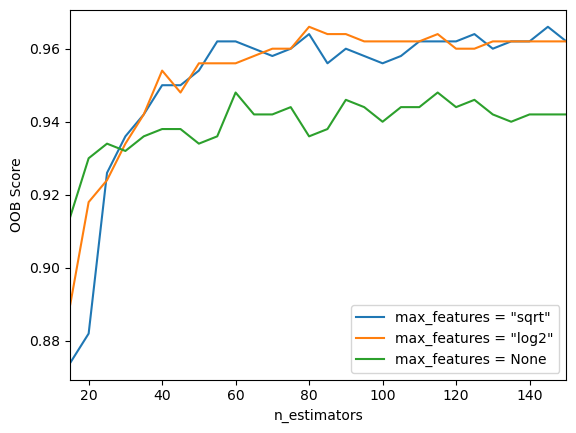

In [23]:
min_estimators = 15
max_estimators = 150

oob_scores = [[], [], []]

for ind, label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators = i)
        clf.fit(X, y)
        oob_scores[ind].append((i, clf.oob_score_))
        
for i in range(len(ensemble_clfs)):
    xs, ys = zip(*oob_scores[i])
    plt.plot(xs, ys, label = ensemble_clfs[i][1])
    
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB Score")
plt.legend(loc = "best")

- n_estimators가 클 때는 max_features가 'sqrt', 'log2', None 순으로 OOB 점수가 높음

### Extra Trees
- 개별 결정 트리의 앙상블을 형성한다는 점에서 전형적인 랜덤 포레스트와 비슷
- 각 트리는 부트스트랩 샘플이 아닌 전체 샘플을 이용해 학습하는 대신 하향식(top-down) 방식의 분기를 학습하는 과정이 랜덤화되었다는 점에서 차이
- 대상 피처의 동질성을 모두 비교한 후 지역 최적값을 계산하는 다소 랜덤한 방식으로 분기를 결정
- 피처 배깅 등을 통해 추출한 대상 피처를 대상으로 각각의 분기 기준값을 해당 피처의 학습 데이터셋 범위(empirical range) 내에서 균등 분포(uniform distribution)로 추출하고 그중 동질성이 가장 높은 분기를 선택
- 랜덤 포레스트와 비교할 때 편향(bias)은 다소 증가, 분산(variance)은 감소 $\rightarrow$ 긍정적인 측면 있음
- ExtraTrees 분류 기법 : sklearn.ensemble.ExtraTreesClassifier 클래스
- ExtraTrres 회귀 기법 : sklearn.ensemble.ExtraTreesRegressor 클래스

사용 시 참고
- 피처 배깅을 수행할 때 적절한 대상 피처 개수의 추가 정보가 없을 때 ($p$ : 피처 개수)
    - 분류 문제 : $\sqrt{p}$ 사용
    - 회귀 문제 : $p$ 사용
- 추가 정보가 없으면 max_depth = None과 min_samples_split = 2를 시도해보는 것이 좋음
- 트리를 만들 때 부트스트랩을 사용하지 않는 것이 기본 설정(bootstrap = False)이지만, 허용하는 것(bootstrap = True)도 가능

### 피처 중요도
피처 중요도(feature importance)
- 피처별로 목표 변수 y의 예측에 기여한 중요도를 계산한 값을 의미
- 목푯값 예측에 기여한다는 뜻에 따라 여러 가지로 정의 가능
- 각 정의에서 다른 값으로 피처 중요도를 정의
- 특정 정의가 절대적으로 우수하지 않음 $\rightarrow$ 여러 가지 정의로 각 중요도를 계산한 다음 비교해보는 것이 좋음
- 중요도가 높은 피처는 목푯값과 높은 인과 관계인 피처가 아니라 목푯값과 높은 상관관계인 피처임

#### MDI 기반
MDI(mean decrease in impurity) 기반 피처 중요도
- 결정 트리, 랜덤 포레스트, 부스팅 트리 등 트리 기반 모델에서 불순도를 이용하여 정의하는 피처 중요도 기법
- 트리 내의 각 내부 노드(internal node)가 두 자식 노드로 분기될 때
    - 분류 : 지니 불순도의 감소 or 정보 이득의 증가 등을 통해 동질성이 늘게 됨
    - 회귀 : 평균 제곱 오차(MSE)의 감소 등을 통해 동질성이 늘게 됨
- 분기에 사용한 피처에 따른 동질성의 증가 크기에 따라 피처 중요도를 정의
- 동질성을 크게 증가시키는 피처가 중요한 피처라는 뜻
- 학습 데이터셋 기준 중요도 산출 방법<br><br>

- 학습 과정에서 미리 구한 동질성 변화 정보를 이용 $\rightarrow$ 계산 속도가 매우 빠름
- 고유한(unique) 원소의 수가 많은 피처를 중요한 피처로 간주하는 경향이 있음 (단점)
- 범주형 피처(categorical feature)보다는 수치형 피처(numerical feature)에서 더 높은 중요도를 얻는 경향이 있음
- 상관관계가 높은 두 가지 중요한 피처가 있을 때 그중 하나만 중요하다고 판정하고 나머지 하나는 중요하지 않다고 판정하는 경향도 있음
- RandomForestClassifier 클래스와 RandomForestRegressor 클래스에서 feature_importances_ 어트리뷰트로 확인 가능

#### 퍼뮤테이션 기반
퍼뮤테이션(permutation) 기반 피처 중요도
- 핵심 아이디어 : 학습한 모델에 검증 데이터를 투입해 성능을 계산하고, 검증 데이터의 특정 피처의 값만 무작위로 바꾼 다음, 다시 성능을 측정하면 그 성능 차이가 해당 피처의 중요도를 나타낸다는 것
- 검증 데이터 내에서 그 피처의 값만 랜덤하게 섞어 특정 피처를 바꾸는 방식
- 검증 데이터셋 기준 중요도 산출 방법

퍼뮤테이션 기반 피처 중요도 산출
- 입력값
    - $m$ :학습한 모델
    - 검증 데이터셋 $D$ : $p$개의 피처, $n$개의 샘플로 구성
    - $K$ : 퍼뮤테이션 시행 횟수
    - $j$ : 중요도를 구할 피처의 번호
    1. $m$에 $D$를 입력해 예측값을 구하고 정확도 등의 성능값 $s$를 구함
    2. $k = 1, 2, \dots, K$에 대해 반복
        - $j$번째 칼럼을 랜덤하게 섞어 $j$번째 칼럼만 망가진 데이터셋 $\tilde{D}_{j,k}$를 정의
        - $m$에 $\tilde{D}_{j,k}$를 입력하여 새로운 성능 $s_{k, j}$를 구함
        
- 출력값
    - $j$번째 피처의 중요도 $FI_j$ 정의  
    $FI_j = s - \frac{1}{K} \displaystyle\sum_{k = 1}^{K} s_{k, j}$ <br><br>
    
- 상관성이 높은 두 중요한 피처 중 한 피처만 높은 피처 중요도를 가지도록 계산 (단점)
- 중요하지 않은 피처임에도 우연히 퍼뮤테이션 이후 성능이 오히려 일부 상승할 수 있음 $\rightarrow$ 피처 중요도가 음수값이 될 수 있음
- 랜덤 포레스트에 한정되지 않음
- sklearn.inspection.permutation_importance() 함수로 퍼뮤테이션 피처 중요도 계산

### 랜덤 포레스트 분류 모델의 피처 중요도
- 랜덤 포레스트 분류기를 함성 데이터셋으로 학습하고 MDI 기반 피처 중요도와 퍼뮤테이션 기반 피처 중요도를 각각 계산
- sklearn.datasets.make_classifiacation() 함수로 가상 분류용 데이터셋을 생성
- 10개의 피처 중 3개만 예측에 도움이 되도록 하고(n_informative = 3) 나머지 피처는 목푯값과 관련 없는 피처로 무작위 생성

In [25]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

X, y = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

- 랜덤 포레스트 분류기를 학습
- 가장 간단한 형태의 분류기를 정의하되 결과의 재현성을 위해 random_state만 저장하도록 함

In [26]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state = 0).fit(X_train, y_train)

- MDI 기반 피처 중요도 계산
- 피처 중요도와 피처 중요도의 표준편차를 계산
- 랜덤 포레스트의 각 트리에 대하여 피처 중요도를 정의할 수 있으므로 트리별 샘플이 생김  
$\rightarrow$ 이에 대한 평균(종합 피처 중요도)과 표준편차 정의 가능
- MDI 기반 방법은 학습 과정 중 계산한 정보를 이용 $\rightarrow$ 속도가 빠름

In [27]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
print(f'MDI 기반 피처 중요도 산출 소요 시간 : {time.time() - start_time : .3f}초')

MDI 기반 피처 중요도 산출 소요 시간 :  0.011초


- 산출한 피처 중요도를 그래프로 나타냄
- 피처 중요도 : 파란 막대
- 표준편차 : 검은 선

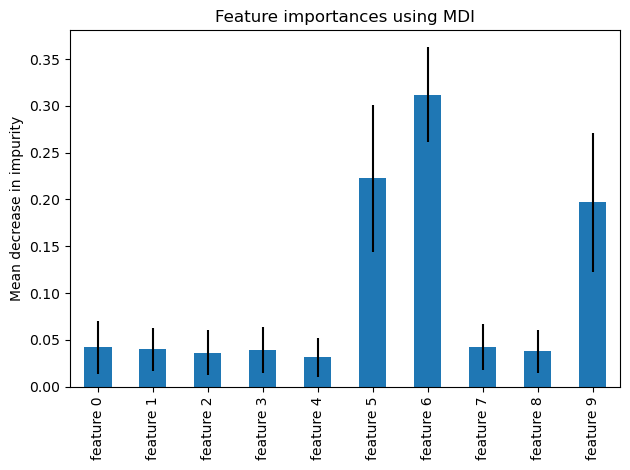

In [28]:
forest_importances = pd.Series(importances, index = feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

- feature_5, feature_6, feature_9 등 세 피처만 중요도가 높고 나머지 7개 피처는 낮음
- 하지만 모든 피처의 중요도가 0보다 유의미하게 큰 피처 중요도를 가짐<br><br>

- 퍼뮤테이션 기반 피처 중요도 산출
- 일반적인 지도 학습 기법에 적용 가능
- 랜덤 포레스트 클래스 함수가 아닌 패키지 함수 sklearn.inspection.permutation_importance()를 호출해 사용

In [29]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(forest,
                                X_test,
                                y_test,
                                n_repeats = 10,
                                random_state = 0)
print(f'퍼뮤테이션 기반 피처 중요도 산출 소요 시간 : {time.time() - start_time : .3f}초')

forest_importances = pd.Series(result.importances_mean, index = feature_names)

퍼뮤테이션 기반 피처 중요도 산출 소요 시간 :  0.683초


- MDI 기반 피처 중요도 계산에 비해 긴 시간이 소요됨
- 별도의 외부 데이터셋을 이용해 직접 계산하기 때문<br><br>

- 결과를 그래프로 출력

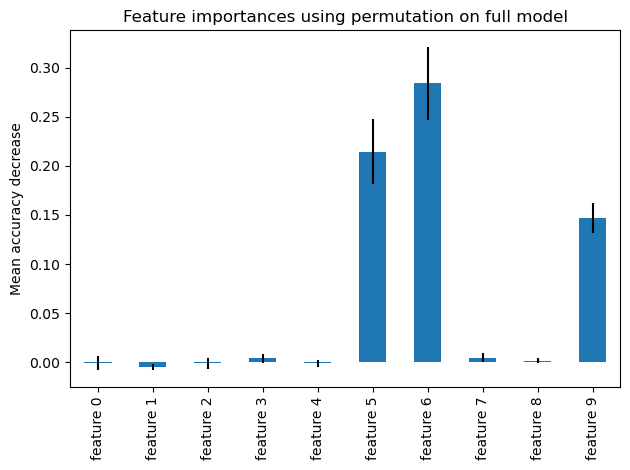

In [31]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = result.importances_std, ax = ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

- 세 피처의 상대적인 중요도 자체는 MDI 기반 피처 중요도와 비슷하게 나타남
- 나머지 7개 피처의 중요도는 MDI 결과와 달리 0에 가까운 값으로 나타남
- MDI보다 퍼뮤테이션 기반 방법이 훨씬 더 정확한 결과를 나타냄

### 되새김 문제

#### 1. RandomForestClassifier 클래스 적용하기
- 붓꽃 데이터셋으로 랜덤 포레스트 분류 모델 학습하고 결과 평가

In [38]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- 학습 데이터셋으로 랜덤 포레스트 분류 모델 RandomForestClassifier를 학습하고 테스트 데이터셋 기준 정확도를 산출  
랜덤 포레스트 분류기 조건
1. 트리의 개수는 50개로 한다.
2. 분기 규칙은 지니 불순도를 최소화하도록 한다.
3. 과적합을 피하기 위해 최대 깊이를 4로 한다.
4. 전체 피처 개수를 $p$라 할 때, 각각의 트리마다 $log_2p$의 피처만을 사용하여 학습을 수행한다.
5. 재현성을 위해 random_state = 1234로 설정한다.

In [39]:
clf = RandomForestClassifier(n_estimators = 50,
                             criterion = 'gini',
                             max_depth = 4,
                             max_features = 'log2',
                             random_state = 1234)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'정확도 : {(y_pred == y_test).mean() * 100 : .2f}%')

정확도 :  98.00%


#### 2. 랜덤 포레스트 회귀 모델 구현하기
- 당뇨병 데이터셋 사용

In [40]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

X, y = load_diabetes(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

train = pd.concat([X_train, y_train], axis = 1)
X_cols, y_col = X.columns.tolist(), y.name

- 최대 깊이를 3으로 하며 분기를 수행할 최소 노드 수는 4로 하도록 하여 각 노드에서 평균 제곱 오차(MSE)를 최소화하는 랜덤 포레스트 회귀 모델을 구현하라.
- 구현한 모델을 (X_train, y_train) 쌍으로 학습하고 이를 (X_test, y_test) 쌍에 적용하여 평균 절대 오차(MAE)를 계산한다.

In [41]:
max_depth = 3
min_samples_split = 4

In [44]:
def eval_mse(left, right, y_col):
    mse, n1, n2 = 0, len(left), len(right)
    
    score = ((left[y_col] - left[y_col].mean())**2).mean()
    mse += score * n1 / (n1 + n2)
    
    score = ((right[y_col] - right[y_col].mean())**2).mean()
    mse += score * n2 / (n1 + n2)
    
    return mse

def eval_y(df, y_col):
    return df[y_col].mean()

def base_tree(train, X_cols, y_col, max_depth = 4, min_samples_split = 4):
    tree = []
    for i in range(0, 2**(max_depth + 1)):
        tree.append(dict({'struct' : None}))
        
    tree[1]['struct'] = train
    for i in range(1, len(tree)):
        if (not isinstance(tree[i]['struct'], pd.DataFrame)):
            continue
            
        if (i >= 2**max_depth):
            tree[i]['struct'] = eval_y(tree[i]['struct'], y_col)
            continue
            
        data = tree[i]['struct']
        a, b, c, d, e = '', float('inf'), float('inf'), None, None
        
        for X_col in X_cols:
            vals = np.sort(data[X_col].unique())
            for val in vals:
                left, right = data[data[X_col] < val], data[data[X_col] >= val]
                mse = eval_mse(left, right, y_col)
                
                if (mse < c):
                    a, b, c, d, e = X_col, val, mse, left, right
        
        tree[i]['col'] = a
        tree[i]['val'] = b
        
        if (len(d) >= min_samples_split):
            tree[i << 1]['struct'] = d
        else:
            tree[i << 1]['struct'] = eval_y(e, y_col)
            
        if (len(e) >= min_samples_split):
            tree[(i << 1) + 1]['struct'] = e
        else:
            tree[(i << 1) + 1]['struct'] = eval_y(e, y_col)
            
    return tree

- 위 정의를 이용해 랜덤 포레스트 회귀 모델 생성
- 빠른 실행을 위해 5개의 트리만 사용
- 데이터에서 30%의 샘플만을 각각 사용

In [45]:
max_samples = 0.3
forest = []

for i in range(5):
    train0 = train.sample(frac = max_samples, random_state = 123)
    forest.append(base_tree(train0, X_cols, y_col))

- 학습한 모델을 테스트 데이터셋에 대입해 예측값을 구하고 평균 절대 오차(MAE)를 계산

In [46]:
mae = 0
for i in range(len(X_test)):
    row = X_test.iloc[i]
    y_pred = 0
    for tree in forest:
        ind = 1
        node = tree[ind]
        
        while (isinstance(node['struct'], pd.DataFrame)):
            if (row[node['col']] < node['val']):
                ind = ind << 1
            else:
                ind = (ind << 1) + 1
                
            node = tree[ind]
            
        y_pred += node['struct']
        
    y_pred = y_pred / len(forest)
    mae += np.abs(y_pred - y_test.iloc[i])
    
print(f'테스트 데이터셋 기준 MAE : {mae / len(y_test) : .2f}')

테스트 데이터셋 기준 MAE :  46.28


In [70]:
# sklearn.ensemble.RandomForestRegressor 클래스 사용한 학습 결과

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 5,
                            max_depth = 3,
                            min_samples_split = 4,
                            random_state = 1234)
reg = reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print(f'RandomForestRegressor로 학습한 모델의 테스트 데이터셋 기준 MAE : {np.abs(y_pred - y_test).mean() : .2f}')

RandomForestRegressor로 학습한 모델의 테스트 데이터셋 기준 MAE :  45.39


#### 3. 퍼뮤테이션 기반 피처 중요도 계산하기
- 퍼뮤테이션 기반 피처 중요도를 트리 계열 모델이 아닌 일반 머신러닝 모델의 관점에서 계산
- 당뇨병 데이터셋을 학습 데이터와 검증 데이터로 분할

In [71]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes(as_frame = True)
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state = 0)

- 피처 중요도를 구하라.
1. 학습 데이터셋으로 규제 페널티 $\alpha$를 0.01로 하는 릿지 회귀 모델을 학습한다.
2. 계산한 모델과 검증 데이터셋으로 퍼뮤테이션 기반 피처 중요도를 계산한다. 이때 퍼뮤테이션 30회 실시하도록 하며 random_state = 0, scoring = 'neg_mean_squared_error'를 적용한다.

In [73]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0.01)
model = model.fit(X_train,y_train)

result = permutation_importance(model,
                                X_val,
                                y_val,
                                n_repeats = 30,
                                random_state = 0,
                                scoring = 'neg_mean_squared_error')

result_series = pd.Series(result.importances_mean, index = X_train.columns)

print(f'퍼뮤테이션 기반 피처별 중요도 : {result_series.sort_values(ascending = False).values[:3]}')

퍼뮤테이션 기반 피처별 중요도 : [1013.90265117  872.69427744  438.68103665]
